In [16]:
%pylab inline
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
import re
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer
from keras.optimizers import SGD

seed = 128
rng = np.random.RandomState(seed)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cla', 'seed', 'imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
root = "/home/ubuntu/music/Checked/"
path = os.path.join(root, "targetdirectory")
list1 = []

for path, subdirs, files in os.walk(root):
    for name in files:
        if name.endswith(".png"):
            cla = re.search('Checked/(\d+)', os.path.join(path))
            path1 = os.path.join(path) + '/' + name
            list1.append([os.path.join(name), path1, cla.group(1)])

dff = pd.DataFrame(list1, columns=['name','path','key'])

In [18]:
    temp = []
    i = 0
    for img_name in dff['path']:
        if os.path.isfile(img_name):
            image_path = os.path.join(img_name)
    #         print image_path
            img = imread(image_path, flatten=True)
            img = img.astype('float32')
            temp.append(img)
            i += 1
print i

5194


In [19]:
y = dff['key'].values
x=np.stack(temp)
x = x.reshape(i, 300, 300, 1).astype('Float32')
# x = x.reshape(i, 90000).astype('Float32')
x /= 255.0
x = 1.0 - x
print x.shape
print y.shape

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


(5194, 300, 300, 1)
(5194,)


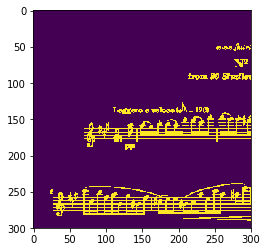

In [20]:
plt.imshow(x[111].reshape(300,300))

In [21]:
xtr, xte, ytr, yte = train_test_split(x, y, stratify=y)
ytr = keras.utils.np_utils.to_categorical(ytr, 12)
yte = keras.utils.np_utils.to_categorical(yte, 12)

In [22]:
input_num_units = 90000
hidden_num_units = 20
output_num_units = 12
epochs = 14
batch_size = 128
pixel_count = 90000

In [23]:
model = Sequential()
model.add(Convolution2D(12, 4, 4, input_shape=(300, 300, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(12, 4, 4))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(120))
model.add(Activation('relu'))
model.add(Dense(12))
model.add(Activation('softmax'))

rms = keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer='rmsprop')


# RMS Optimizer
# rms = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# model.compile(loss='categorical_crossentropy', optimizer=rms,  metrics=['accuracy'])

# Adagrade Optimizer
# adagrad = keras.optimizers.Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)
# model.compile(loss='categorical_crossentropy', optimizer=adagrad,  metrics=['accuracy'])

In [24]:
# model.fit(xtr, ytr, batch_size=72, nb_epoch=14, verbose=2, validation_data=(xte, yte))
# score, acc = model.evaluate(xte, yte, verbose=0)
# print('Test accuracy:', acc)

Train on 3895 samples, validate on 1299 samples
Epoch 1/14
13s - loss: 2.3382 - acc: 0.2739 - val_loss: 2.1524 - val_acc: 0.3149
Epoch 2/14
13s - loss: 1.2579 - acc: 0.6033 - val_loss: 1.1570 - val_acc: 0.6074
Epoch 3/14
13s - loss: 0.5317 - acc: 0.8475 - val_loss: 0.7829 - val_acc: 0.7529
Epoch 4/14
13s - loss: 0.1958 - acc: 0.9448 - val_loss: 0.8620 - val_acc: 0.7413
Epoch 5/14
13s - loss: 0.0700 - acc: 0.9789 - val_loss: 0.6807 - val_acc: 0.8014
Epoch 6/14
13s - loss: 0.0367 - acc: 0.9902 - val_loss: 0.6510 - val_acc: 0.8268
Epoch 7/14
13s - loss: 0.0242 - acc: 0.9938 - val_loss: 0.7486 - val_acc: 0.7968
Epoch 8/14
13s - loss: 0.0271 - acc: 0.9941 - val_loss: 0.7047 - val_acc: 0.8253
Epoch 9/14
13s - loss: 0.0171 - acc: 0.9954 - val_loss: 0.6102 - val_acc: 0.8329
Epoch 10/14
13s - loss: 0.0056 - acc: 0.9985 - val_loss: 0.6670 - val_acc: 0.8499
Epoch 11/14
13s - loss: 0.0082 - acc: 0.9985 - val_loss: 0.7951 - val_acc: 0.8037
Epoch 12/14
13s - loss: 0.0042 - acc: 0.9990 - val_loss: 0.

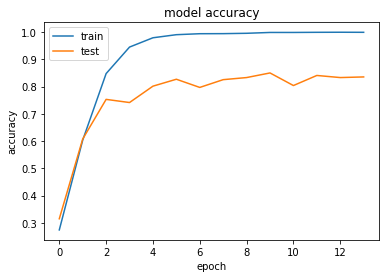

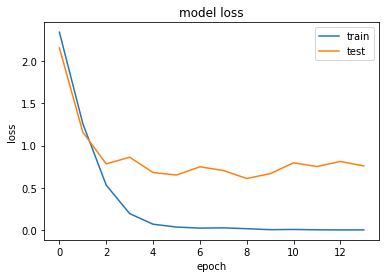

In [25]:
trained_model = model.fit(xtr, ytr, batch_size=72, nb_epoch=14, verbose=2, validation_data=(xte, yte))
# list all data in history
print(trained_model.history.keys())
# summarize history for accuracy
plt.plot(trained_model.history['acc'])
plt.plot(trained_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [26]:
score = model.evaluate(xte, yte, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
# print(model.predict_classes(xte[1:5]))
# print(yte[1:5])

('Test score:', 0.7585820304695875)
('Test accuracy:', 0.83525789077691248)


In [27]:
from sklearn.metrics import classification_report,confusion_matrix

Y_pred = model.predict(xte)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

y_pred = model.predict_classes(xte)
print(y_pred)

p=model.predict_proba(xte)

target_names = ['C','G','D','A','E','B','Gb','Db','Ab','Eb','Bb','F']
print(classification_report(np.argmax(yte,axis=1), y_pred, target_names=target_names))
print(confusion_matrix(np.argmax(yte,axis=1), y_pred))

[[  1.77425386e-06   1.65296790e-08   2.81930483e-07 ...,   5.82931072e-08
    9.99997735e-01   2.57321346e-08]
 [  9.78318426e-10   3.71230720e-03   9.96268630e-01 ...,   9.32282234e-08
    1.66696227e-05   2.17829577e-09]
 [  5.72924412e-13   9.99998093e-01   4.24094759e-10 ...,   3.44098516e-15
    3.43842663e-11   1.85666318e-06]
 ..., 
 [  1.27412227e-03   1.77545519e-06   2.70745549e-02 ...,   9.70060408e-01
    1.08401537e-05   2.18304038e-07]
 [  2.28667815e-07   2.45221463e-06   5.95821916e-12 ...,   4.11066363e-12
    1.29481004e-09   9.99997258e-01]
 [  4.69127350e-04   3.24962706e-08   9.11896706e-01 ...,   8.75204206e-02
    4.89326521e-05   3.48064714e-06]]
[10  2  1 ...,  9 11  2]
1248/1299 [===========================>..] - ETA: 0s             precision    recall  f1-score   support

          C       0.83      0.93      0.87       229
          G       0.91      0.90      0.91       292
          D       0.75      0.94      0.83       205
          A       0.80      0.

In [28]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_5 (Convolution2D)  (None, 297, 297, 12)  204         convolution2d_input_3[0][0]      
____________________________________________________________________________________________________
activation_9 (Activation)        (None, 297, 297, 12)  0           convolution2d_5[0][0]            
____________________________________________________________________________________________________
maxpooling2d_5 (MaxPooling2D)    (None, 148, 148, 12)  0           activation_9[0][0]               
____________________________________________________________________________________________________
convolution2d_6 (Convolution2D)  (None, 145, 145, 12)  2316        maxpooling2d_5[0][0]             
___________________________________________________________________________________________